# Understanding Feature selection with Breast Cancer Dataset

Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to classify whether the breast cancer is benign or malignant.

Feature selection with correlation, univariate feature selection, recursive feature elimination, recursive feature elimination with cross validation and tree based feature selection methods are used with random forest classification. 


## About the data:
Attribute Information:

   * 1) ID number 
   * 2) Diagnosis (M = malignant, B = benign) 
   * 3–32)

Ten real-valued features are computed for each cell nucleus:

   * radius (mean of distances from center to points on the perimeter)
   * texture (standard deviation of gray-scale values)
   * perimeter
   * area
   * smoothness (local variation in radius lengths)
   * compactness (perimeter² / area — 1.0)
   * concavity (severity of concave portions of the contour)
   * concave points (number of concave portions of the contour)
   * symmetry
   * fractal dimension (“coastline approximation” — 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Read the data and basic data study

In [2]:
data = pd.read_csv('../data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


There are 4 things that take our attention 
* 1) There is an id that cannot be used for classificaiton 
* 2) Diagnosis is our class label 
* 3) Unnamed: 32 feature includes NaN so we do not need it. 
* 4) I do not have any idea about other feature names actually I do not need because machine learning is awesome :)

Therefore, drop these unnecessary features. However do not forget this is not a feature selection. This is like a browse a pub, we do not choose our drink yet !!!

In [5]:
X = data.drop(columns=['Unnamed: 32', 'id', 'diagnosis'])
y = data['diagnosis']

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant:  212


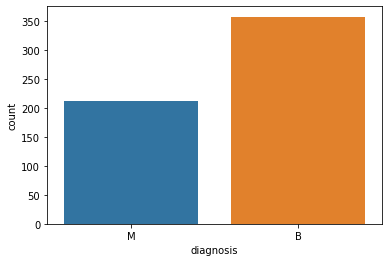

In [6]:
ax = sns.countplot(y, label='Count')
B, M = y.value_counts()
print('Number of Benign: ', B)
print('Number of Malignant: ', M)

Okay, now we have features but what does they mean or actually how much do we need to know about these features The answer is that we do not need to know meaning of these features however in order to imagine in our mind we should know something like variance, standart deviation, number of sample (count) or max min values. These type of information helps to understand about what is going on data. For example , the question that comes to mind is, the area_mean feature's max value is 2500 and smoothness_mean features' max 0.16340. Therefore do we need standirdization or normalization before visualization, feature selection, feature extraction or classificaiton? The answer is yes and no not surprising ha :) Anyway lets go step by step and start with visualization.

## Visualization
In order to visualizate data we are going to use seaborn plots of violin plot and swarm plot. Do not forget we are not selecting feature, we are trying to know data.

In [7]:
X_std = (X - X.mean())/ X.std()

In [8]:
X_melted = pd.melt(pd.concat([X_std, y], axis=1), id_vars='diagnosis', var_name='features', value_name='value')
X_melted

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758
...,...,...,...
17065,M,fractal_dimension_worst,-0.708467
17066,M,fractal_dimension_worst,-0.973122
17067,M,fractal_dimension_worst,-0.318129
17068,M,fractal_dimension_worst,2.217684


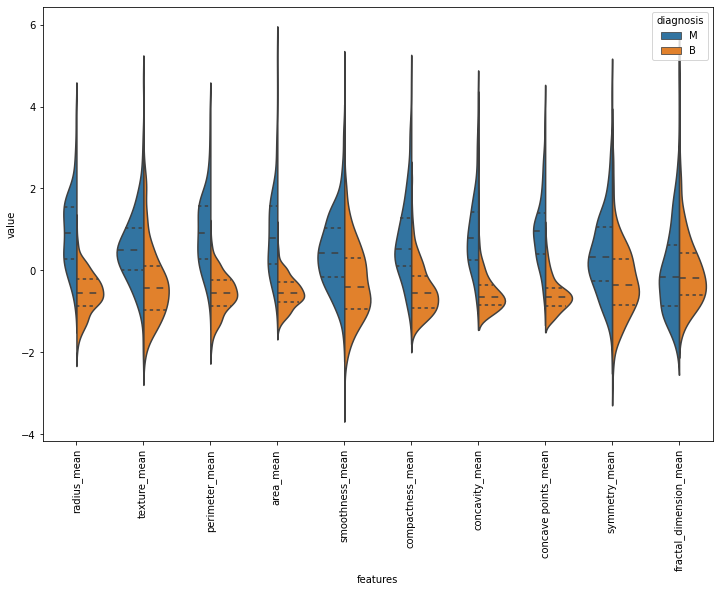

In [9]:
X_melted_mean = X_melted[X_melted['features'].str.contains('_mean')]

plt.figure(figsize=(12, 8))
sns.violinplot(data=X_melted_mean, x='features', y='value', hue='diagnosis', split=True, inner='quart')
plt.xticks(rotation=90)
plt.show()

**Insights**:

- concavity_mean and concave points_mean distribution looks very similar
- confusing features - smoothness_mean, symmetry_mean, fractal_dimension_mean

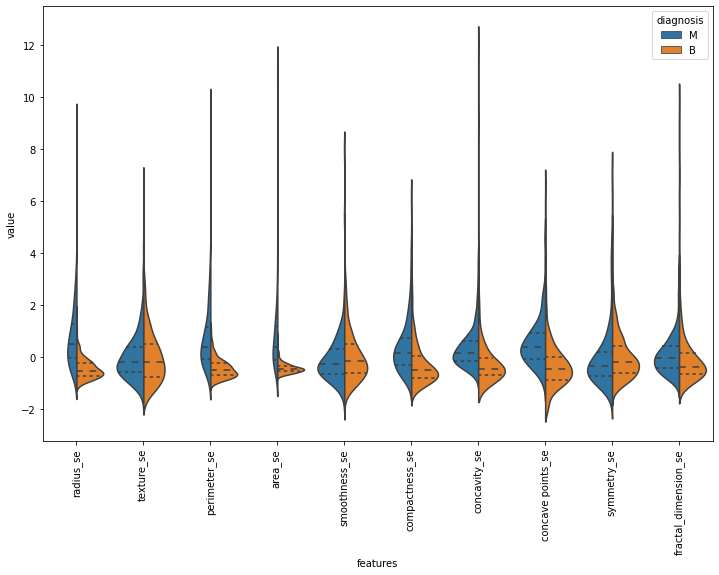

In [10]:
X_melted_se = X_melted[X_melted['features'].str.contains('_se')]

plt.figure(figsize=(12, 8))
sns.violinplot(data=X_melted_se, x='features', y='value', hue='diagnosis', split=True, inner='quart')
plt.xticks(rotation=90)
plt.show()

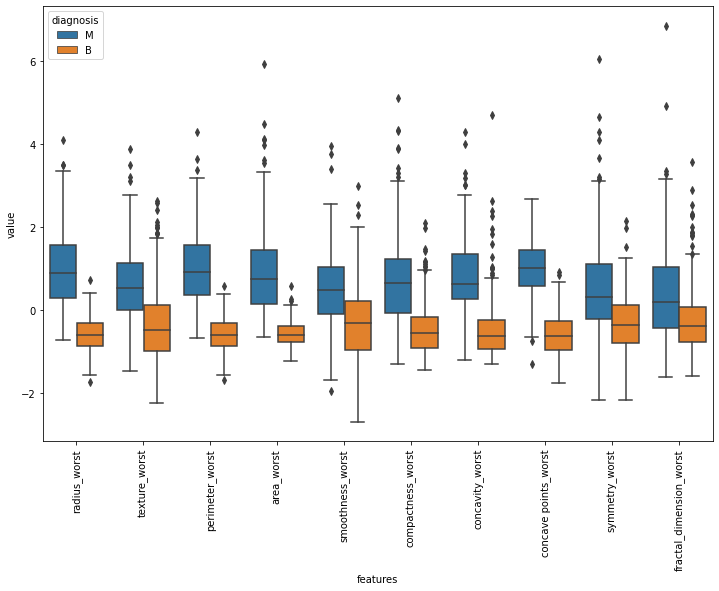

In [11]:
X_melted_se = X_melted[X_melted['features'].str.contains('_worst')]

plt.figure(figsize=(12, 8))
sns.boxplot(data=X_melted_se, x='features', y='value', hue='diagnosis')
plt.xticks(rotation=90)
plt.show()

## Correlation between two features


Lets interpret one more thing about plot above, variable of concavity_worst and concave point_worst looks like similar but how can we decide whether they are correlated with each other or not. (Not always true but, basically if the features are correlated with each other we can drop one of them)

In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

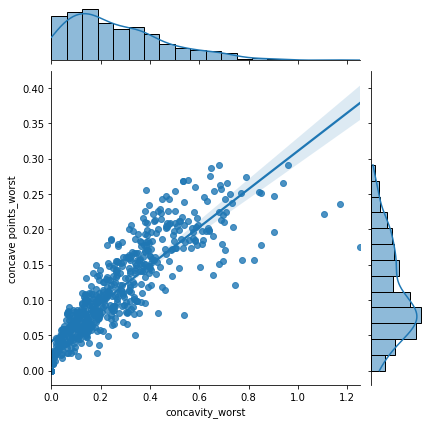

In [12]:
sns.jointplot(X.loc[:, 'concavity_worst'], X.loc[:, 'concave points_worst'], kind='reg')
plt.show()

In [13]:
# CAlculate pearsonr correlation coefficient
from scipy.stats import pearsonr
coeff, p_value = pearsonr(X.loc[:, 'concavity_worst'], X.loc[:, 'concave points_worst'])
print('Pearson R correlation coefficient: ', coeff)
print('p-value: ', p_value)

Pearson R correlation coefficient:  0.8554338603439992
p-value:  3.7640977296938686e-164


***Insights:***
 - Here, p-value is less than statistical significance 0.05.
 - Hence, there is enough statistical evidence to reject the null hypotheis (e.g. no correlation between two variables).

## Correlation between three or more features?

What about three or more feauture comparision? For this purpose we can use pair grid plot. Also it seems very cool :) And we discover one more thing radius_worst, perimeter_worst and area_worst are correlated as it can be seen pair grid plot. We definetely use these discoveries for feature selection.

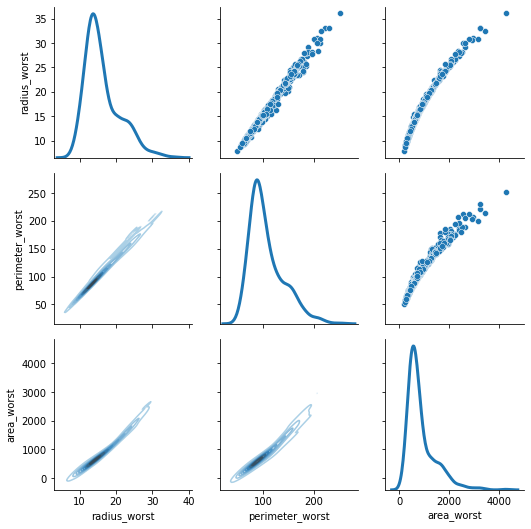

In [14]:
# PairGrid plot
g = sns.PairGrid(data.loc[:, ['radius_worst', 'perimeter_worst', 'area_worst']], diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_diag(sns.kdeplot, lw=3)
plt.show()

Up to this point, we make some comments and discoveries on data already. If you like what we did, I am sure swarm plot will open the pub's door :)

In swarm plot, we will do three part like violin plot not to make plot very complex appearance

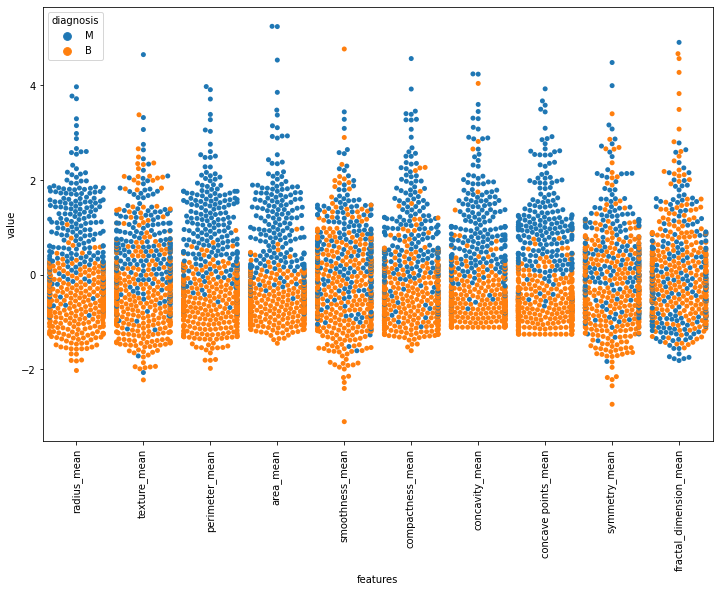

In [15]:
X_melted_mean = X_melted[X_melted['features'].str.contains('_mean')]

plt.figure(figsize=(12, 8))
sns.swarmplot(data=X_melted_mean, x='features', y='value', hue='diagnosis', split=False)
plt.xticks(rotation=90)
plt.show()

## What if we want to observe all correlation between features? 

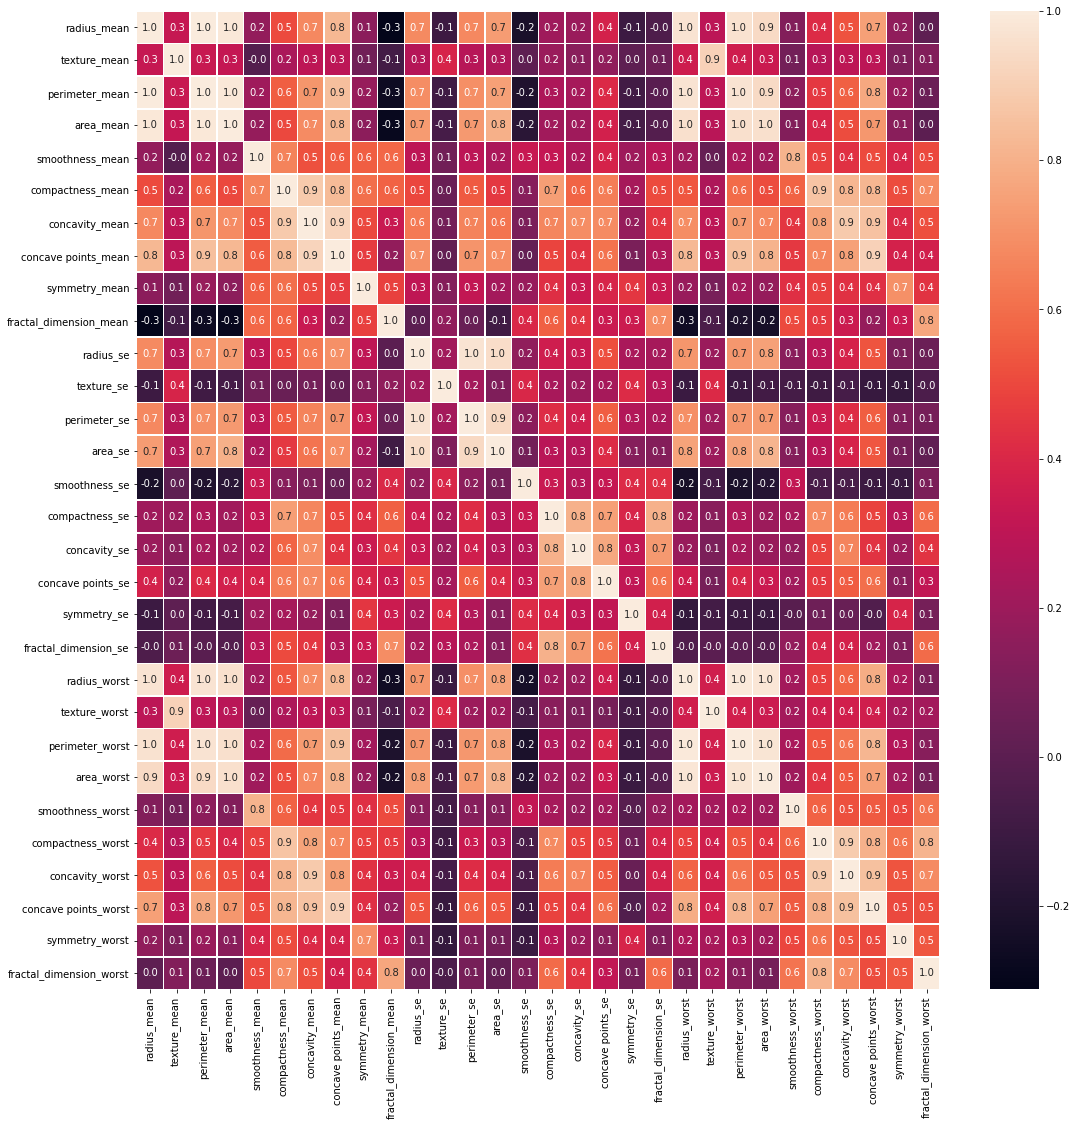

In [16]:
# Correlation map
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax)
plt.show()

## Feature Selection and Random Forest Classification

Today our purpuse is to try new cocktails. For example, we are finaly in the pub and we want to drink different tastes. Therefore, we need to compare ingredients of drinks. If one of them includes lemon, after drinking it we need to eliminate other drinks which includes lemon so as to experience very different tastes.

![overivew](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png)

[source](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

In this part we will select feature with different methods that are feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) and tree based feature selection. We will use random forest classification in order to train our model and predict.


## 1) Feature selection with correlation and random forest classification (Unsupervised)

As it can be seen in heatmap figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. If you ask how i choose area_mean as a feature to use, well actually there is no correct answer, I just look at swarm plots and area_mean looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier.

In [17]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
X_1 = X.drop(drop_list1, axis=1)        # Do not modify x, we will use it later 
print(X_1.shape)
X_1.head()

(569, 16)


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


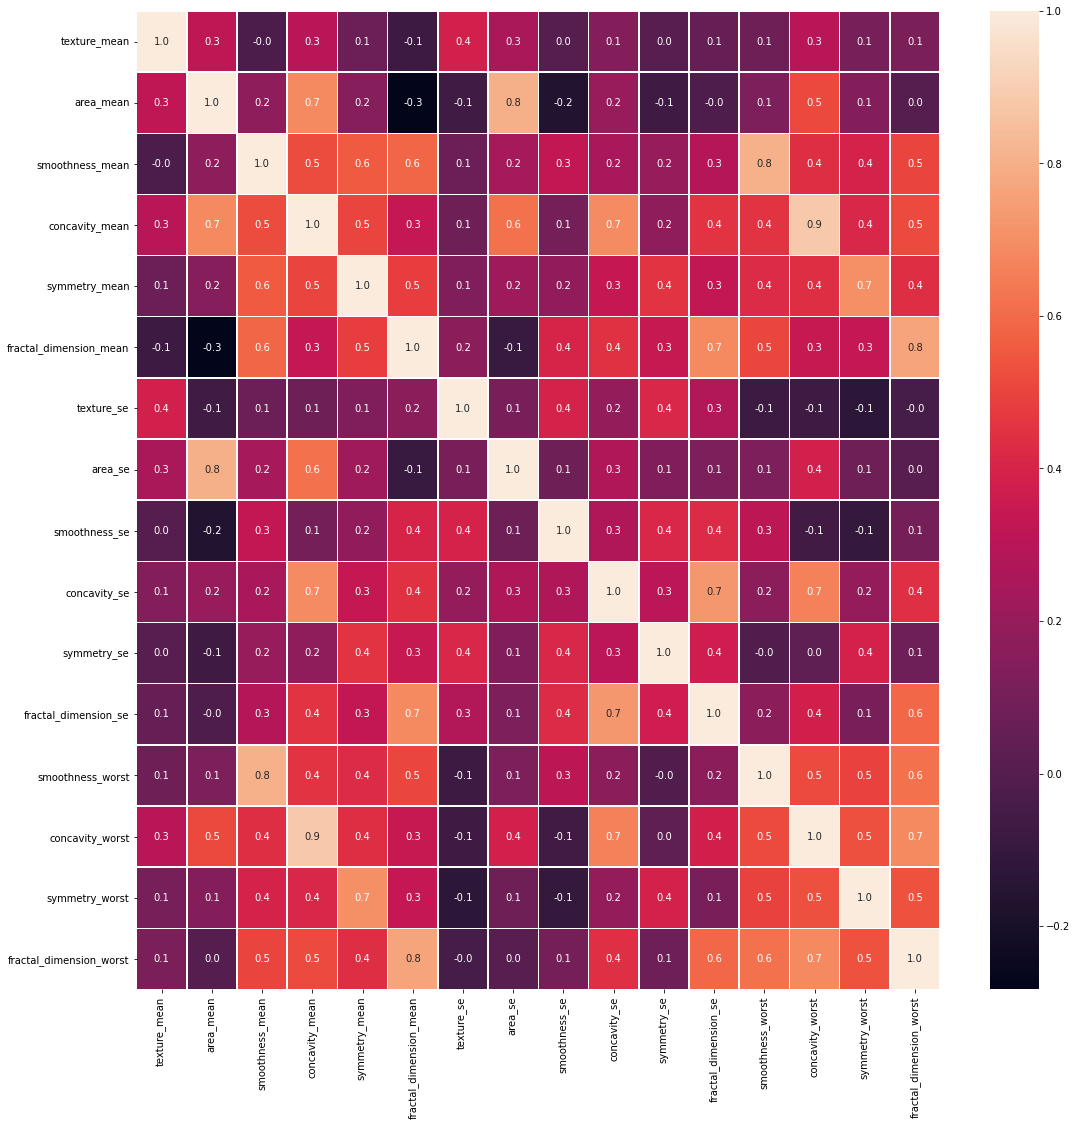

In [18]:
# Correlation map
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_1.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax)
plt.show()

Accuracy:  0.9707602339181286


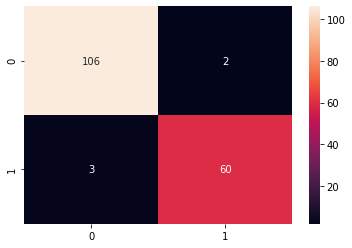

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=42)

clf_rf_1 = RandomForestClassifier(random_state=42)
clf_rf_1.fit(X_1_train, y_train)

y_pred = clf_rf_1.predict(X_1_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Accuracy is 97% and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other feature selection methods to find better results.

## 2) Univariate feature selection and random forest classification (Supervised: Filter Method: Feature Importance)

In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. 
In this method we need to choose the number of features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.



In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Find 5 best scored features
select_feature = SelectKBest(chi2, k=5).fit(X_1_train, y_train)

In [21]:
print('Score list: \n', select_feature.scores_)
print('Feature List: \n', X_1_train.columns[select_feature.get_support(indices=True)])

Score list: 
 [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature List: 
 Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')


Best 5 feature to classify is that area_mean, area_se, texture_mean, concavity_worst and concavity_mean. So lets se what happens if we use only these best scored 5 feature.

Accuracy:  0.9532163742690059


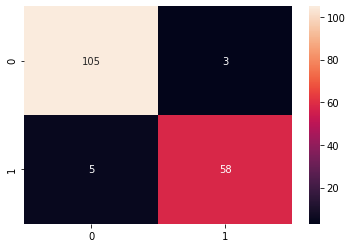

In [22]:
X_2_train = select_feature.transform(X_1_train)
X_2_test = select_feature.transform(X_1_test)

clf_rf_2 = RandomForestClassifier(random_state=42)
clf_rf_2.fit(X_2_train, y_train)

y_pred = clf_rf_2.predict(X_2_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Accuracy is 95% and as it can be seen in confusion matrix, we make few wrong prediction. What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although we use 5 features in selectkBest method accuracies look similar. Now lets see other feature selection methods to find better results.

## 3) Recursive feature elimination (RFE) with random forest (Supervised: Wrapper: RFE)

Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

Like previous method, we will use 5 features. However, which 5 features will we use ? We will choose them with RFE method.

In [23]:
from sklearn.feature_selection import RFE

clf_rf_3 = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe.fit(X_1_train, y_train)
print(X_1_train.columns[rfe.support_])

Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')


Chosen 5 best features by rfe are, area_mean, concavity_mean, area_se, concavity_worst and concativity_worst. They are exactly similar with previous (selectkBest) method. Therefore we do not need to calculate accuracy again. Shortly, we can say that we make good feature selection with rfe and selectkBest methods. However as you can see there is a problem, okey I except we find best 5 feature with two different method and these features are same but why it is 5. Maybe if we use best 2 or best 15 feature we will have better accuracy. Therefore lets see how many feature we need to use with rfecv method.

## 4) Recursive feature elimination with cross validation and random forest classification

Now we will not only find best features but we also find how many features do we need for best accuracy.

In [24]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5, scoring='accuracy')   # 5-fold cross-validation
rfecv = rfecv.fit(X_1_train, y_train)

print('Optimal number of features: ', rfecv.n_features_)
print('Best features: \n', X_1_train.columns[rfecv.support_])

Optimal number of features:  16
Best features: 
 Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Finally, we find best 15 features for best classification. Lets look at best accuracy with plot.

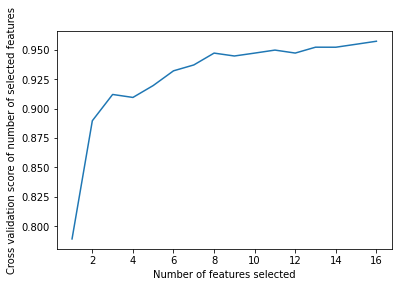

In [25]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score of number of selected features')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Accuracy:  0.9532163742690059


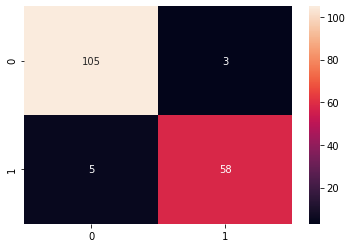

In [26]:
X_rfecv_train = select_feature.transform(X_1_train)
X_rfecv_test = select_feature.transform(X_1_test)

clf_rf_rfecv = RandomForestClassifier(random_state=42)
clf_rf_rfecv.fit(X_rfecv_train, y_train)

y_pred = clf_rf_rfecv.predict(X_rfecv_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## 5) Tree based feature selection and random forest classification  (Supervised: Instrinsic: Trees)

In random forest classification method there is a feature importances attributes that is the feature importances (the higher, the more important the feature). !!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

Feature ranking:
1. feature 3 (0.205763)
2. feature 7 (0.182113)
3. feature 1 (0.173197)
4. feature 13 (0.155759)
5. feature 14 (0.046618)
6. feature 0 (0.039264)
7. feature 9 (0.035356)
8. feature 12 (0.031963)
9. feature 11 (0.024533)
10. feature 2 (0.023228)
11. feature 5 (0.022754)
12. feature 10 (0.015634)
13. feature 15 (0.012149)
14. feature 6 (0.011856)
15. feature 4 (0.010372)
16. feature 8 (0.009438)


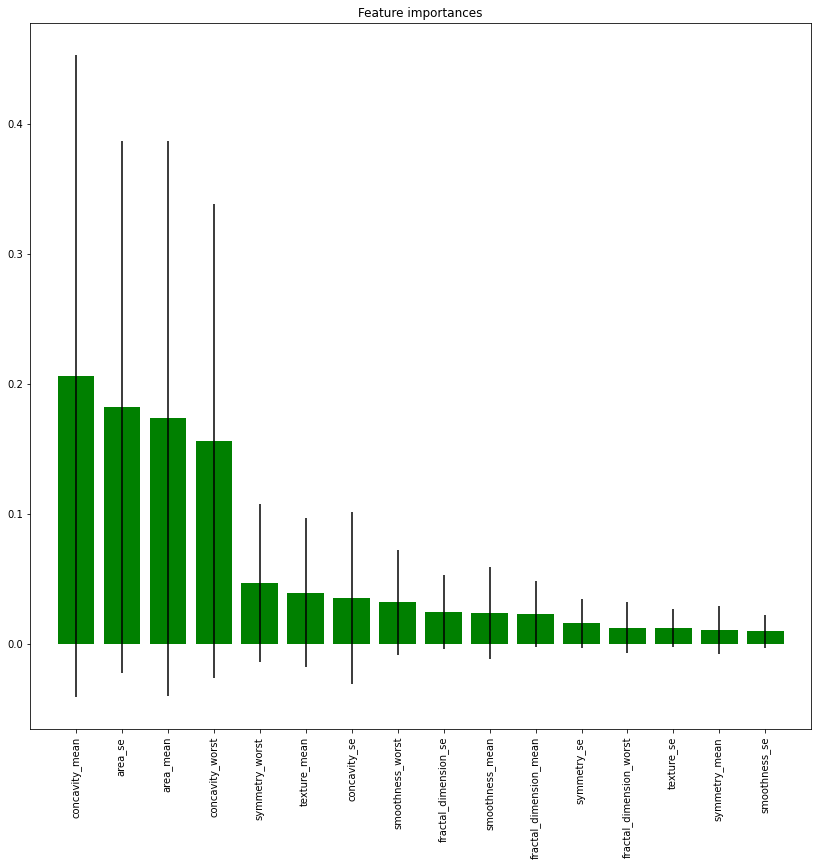

In [27]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_1_train, y_train)

importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_], axis=0)
indices = np.argsort(importances)[::-1]   # [::-1] reverses the list/array

# Print the feature ranking
print("Feature ranking:")

for f in range(X_1_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure(1, figsize=(14, 13))
plt.title('Feature importances')
plt.bar(range(X_1_train.shape[1]), importances[indices], color='g', yerr=std[indices], align='center')
plt.xticks(range(X_1_train.shape[1]), X_1_train.columns[indices],rotation=90)
plt.xlim([-1, X_1_train.shape[1]])
plt.show()

As you can seen in plot above, after 5 best features importance of features decrease. Therefore we can focus these 5 features. As I sad before, I give importance to understand features and find best of them.

## Conclusion

Shortly, I tried to show importance of feature selection and data visualization. Default data includes 33 feature but after feature selection we drop this number from 33 to 5 with accuracy 95%.